In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import lalsimulation.gwsignal.core.waveform as wfm

from gw_signal_tools.fisher import phenomx_generator

# Enable equivalency between rad and dim_less
# import gw_signal_tools.units
from gw_signal_tools import preferred_unit_system

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [2]:
from gw_signal_tools import PLOT_STYLE_SHEET
plt.style.use(PLOT_STYLE_SHEET)

## Alignment Demo

In [3]:
from scipy.optimize import minimize
from gw_signal_tools.inner_product import inner_product, norm, overlap
from gw_signal_tools.fisher import FisherMatrix

In [4]:
f_min = 20.*u.Hz  # Cutoff frequency
f_max = 1024. * u.Hz  # Cutoff from PSD
delta_f = 2**-6 * u.Hz
f_ref = f_min


alignment_demo_params = {
    'total_mass': 50.*u.Msun,
    'mass_ratio': 0.5*u.dimensionless_unscaled,
    'f22_start': f_min,
    'f_max': f_max,
    'deltaF': delta_f,
    'f22_ref': f_ref,
    'phi_ref': 0.*u.rad,
    'distance': 440.*u.Mpc,
    'inclination': 0.*u.rad,
    'eccentricity': 0.*u.dimensionless_unscaled,
    'longAscNodes': 0.*u.rad,
    'meanPerAno': 0.*u.rad,
    'condition': 0
}

In [5]:
wf_model_1 = 'IMRPhenomXPHM'
# wf_model_2 = 'IMRPhenomA'
wf_model_2 = 'IMRPhenomD'

wf_generator_1 = FisherMatrix.get_wf_generator(wf_model_1)
wf_generator_2 = FisherMatrix.get_wf_generator(wf_model_2)

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

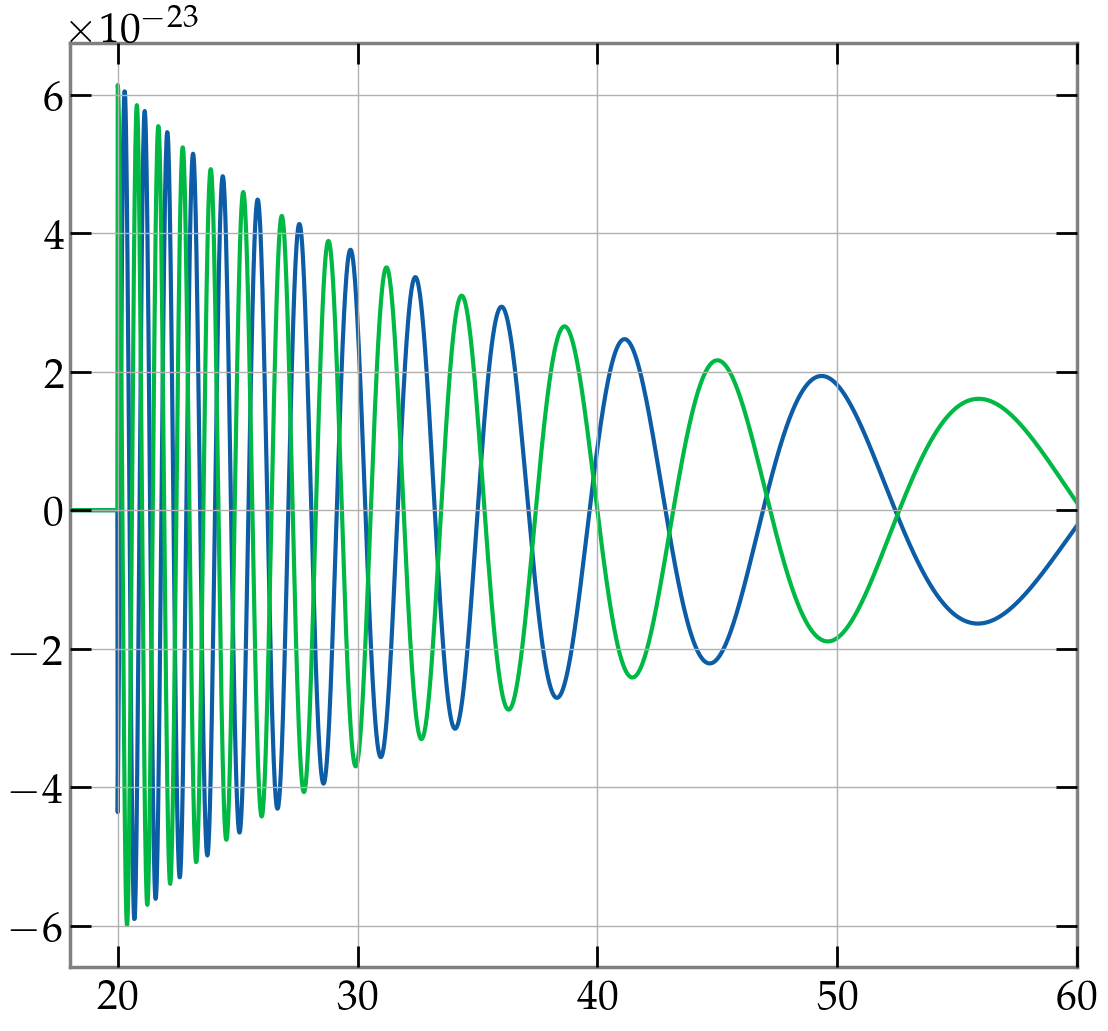

In [6]:
wf1 = wf_generator_1(alignment_demo_params)
wf2 = wf_generator_2(alignment_demo_params)

plt.plot(wf1)

plt.plot(wf2)

plt.xlim(18, 60)

plt.show()

### Optimization over Time Shift

In [7]:
def optimize_diff_over_time(wf1, wf2):
    def wf2_shifted(t_shift):
        return wf2 * np.exp(-2.j * np.pi * wf2.frequencies.value * t_shift)
    
    norm_wf1 = norm(wf1)
    norm_wf2 = norm(wf2)  # Equal to norm of wf_shifted

    def loss_func(args):
        t_shift = args[0]
        return 1. - inner_product(wf1, wf2_shifted(t_shift)) / (norm_wf1 * norm_wf2)  # Have more favorable values, otherwise optimization might not work
        # return norm(wf1 - wf2_shifted(t_shift)) / np.sqrt(norm_wf1 * norm_wf2)  # Have more favorable values, otherwise optimization might not work
    # TODO: enable other args for norm?

    result = minimize(loss_func, 0.0)
    # result = minimize(loss_func, 0.0, bounds=[(None, None)])

    return wf1, wf2_shifted(result.x[0]), result

In [8]:
wf1 = wf_generator_1(alignment_demo_params)
wf2 = wf_generator_2(alignment_demo_params)

wf1_time_shifted, wf2_time_shifted, info_time_shift = optimize_diff_over_time(wf1, wf2)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

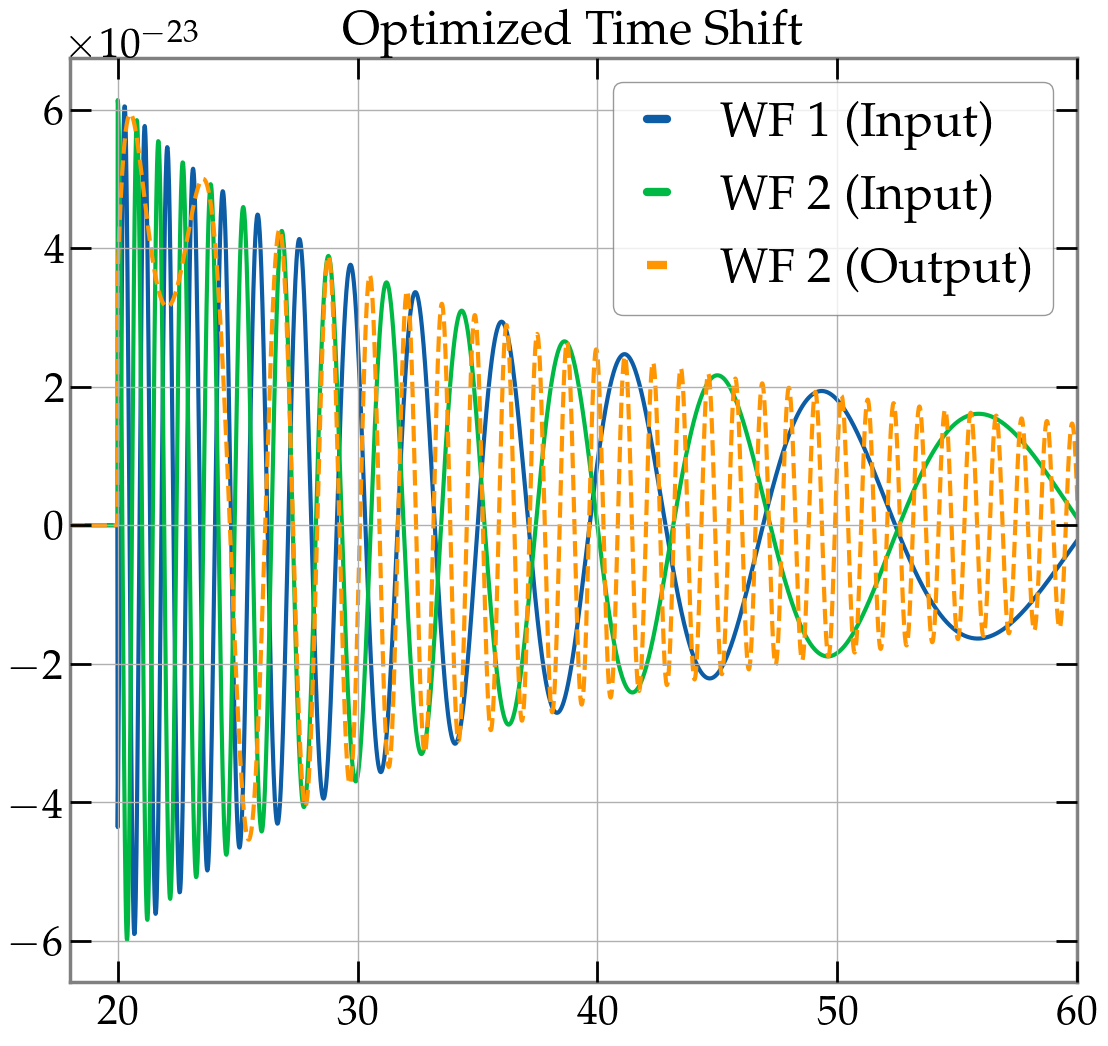

In [9]:
plt.plot(wf1, label='WF 1 (Input)')
# plt.plot(wf1_time_shifted, '--', label='WF 1 (Output)')

plt.plot(wf2, label='WF 2 (Input)')
plt.plot(wf2_time_shifted, '--', label='WF 2 (Output)')

plt.xlim(18, 60)

plt.title('Optimized Time Shift')
plt.legend()

plt.show()

### Optimization over Phase Shift

In [10]:
def optimize_diff_over_phase(wf1, wf2):
    def wf2_shifted(phi_shift):
        return wf2 * np.exp(2.j * phi_shift)
    
    norm_wf1 = norm(wf1)
    norm_wf2 = norm(wf2)  # Equal to norm of wf_shifted

    def loss_func(args):
        phi_shift = args[0]
        return 1. - inner_product(wf1, wf2_shifted(phi_shift)) / (norm_wf1 * norm_wf2)  # Have more favorable values, otherwise optimization might not work
        # return 1. - overlap(wf1, wf2_shifted(phi_shift))  # Have more favorable values, otherwise optimization might not work
        # return norm(wf1 - wf2_shifted(phi_shift)) / np.sqrt(norm_wf1 * norm_wf2)  # Have more favorable values, otherwise optimization might not work
    # TODO: enable other args for norm?

    # result = minimize(loss_func, 0.0)
    # result = minimize(loss_func, [0.], bounds=[(0., 2.*np.pi)])
    result = minimize(loss_func, [0.], bounds=[(-np.pi, np.pi)])  # Only bounds that work
    # result = minimize(loss_func, [0.], bounds=[(0., np.pi)])

    return wf1, wf2_shifted(result.x[0]), result


def optimize_diff_over_phi_ref(wf_params, wf_generator_1, wf_generator_2):
    wf_params = wf_params.copy()
    wf1 = wf_generator_1(wf_params)
    
    norm_wf1 = norm(wf1)
    norm_wf2 = norm(wf2)  # Equal to norm of wf_shifted

    def wf2_shifted(phi_ref):
        # wf2 = wf_generator_2(wf_params | {'phi_ref': phi_ref})
        # wf2 = wf_generator_2(wf_params | {'phi_ref': phi_ref*u.rad})
        wf2 = wf_generator_2(wf_params | {'phi_ref': phi_ref*u.dimensionless_unscaled})
        return wf2
    
    # print(wf2_shifted(1000.j))  # Gives same error. What???
    
    def loss_func(args):
        phi_ref = args[0]
        return 1. - inner_product(wf1, wf2_shifted(phi_ref)) / (norm_wf1 * norm_wf2)  # Have more favorable values, otherwise optimization might not work
        # return 1.0 - overlap(wf1, wf2_shifted(phi_ref))
    
    # result = minimize(loss_func, [0.])
    # result = minimize(loss_func, [0.], bounds=[(0., 2.*np.pi)])
    result = minimize(loss_func, [0.], bounds=[(-np.pi, np.pi)])  # Only bounds that work
    # result = minimize(loss_func, [0.], bounds=[(0., np.pi)])
    
    return wf1, wf2_shifted(result.x[0]), result

In [11]:
wf1 = wf_generator_1(alignment_demo_params)
wf2 = wf_generator_2(alignment_demo_params)

wf1_phase_shifted, wf2_phase_shifted, info_phase_shift = optimize_diff_over_phase(wf1, wf2)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [12]:
wf1_phi_ref_shifted, wf2_phi_ref_shifted, info_phi_ref_shift = optimize_diff_over_phi_ref(alignment_demo_params, wf_generator_1, wf_generator_2)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

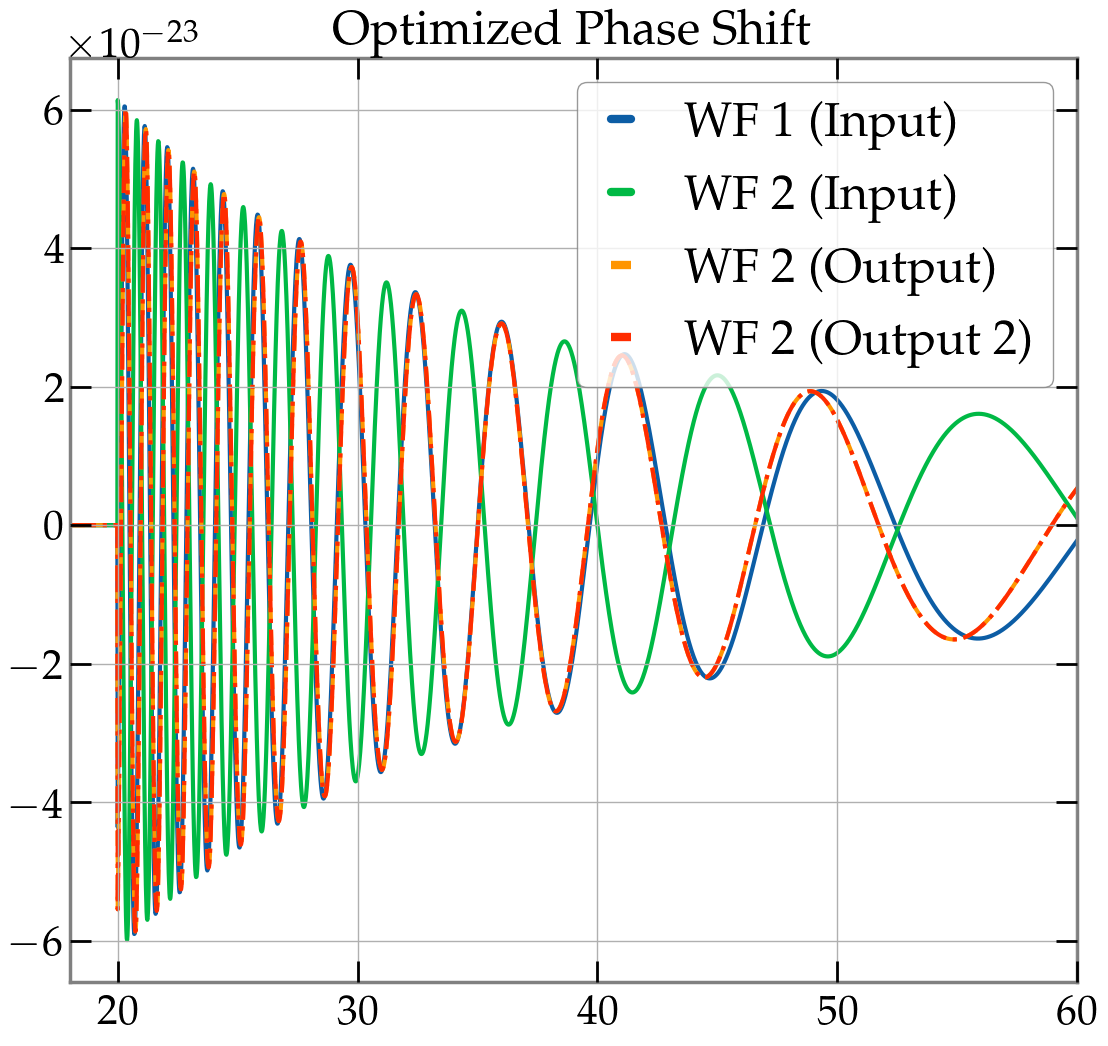

In [13]:
plt.plot(wf1, label='WF 1 (Input)')
# plt.plot(wf1_phase_shifted, '--', label='WF 1 (Output)')

plt.plot(wf2, label='WF 2 (Input)')
plt.plot(wf2_phase_shifted, '--', label='WF 2 (Output)')
plt.plot(wf2_phi_ref_shifted, '-.', label='WF 2 (Output 2)')

plt.xlim(18, 60)

plt.title('Optimized Phase Shift')
plt.legend()

plt.show()

As we can see, optimization over global phase and $\phi_\mathrm{ref}$ is equivalent here. This might not be the case if higher harmonics have a significant impact or if the binary is precessing.

### Optimization over Phase and Time Shift

In [14]:
def optimize_diff_over_time_and_phase(wf1, wf2):
    def wf2_shifted(t_shift, phi_shift):
        return wf2 * np.exp(-2.j * np.pi * wf2.frequencies.value * t_shift + 2.j * phi_shift)
    
    norm_wf1 = norm(wf1)
    norm_wf2 = norm(wf2)  # Equal to norm of wf_shifted

    def loss_func(args):
        t_shift, phi_shift = args
        return norm(wf1 - wf2_shifted(t_shift, phi_shift)) / np.sqrt(norm_wf1 * norm_wf2)  # Have more favorable values, otherwise optimization might not work
    # TODO: enable other args for norm?

    # result = minimize(loss_func, [0.0, 0.0])
    # result = minimize(loss_func, np.array([0.0, 0.42]), bounds=[(None, None), (0., 2.*np.pi)])
    # result = minimize(loss_func, np.array([0.0, 0.42]), bounds=[(None, None), (-4.*np.pi, 4.*np.pi)])
    # result = minimize(loss_func, np.array([0.0, 0.0]), bounds=[(-np.inf, np.inf), (-2.*np.pi, 2.*np.pi)])
    result = minimize(loss_func, np.array([0., 0.]), bounds=[(None, None), (-np.pi, np.pi)], method='Nelder-Mead')  # Correct bounds. This method is only one that does what it should

    opt_args = result.x

    # result.x[1] %= 2.*np.pi

    return wf1, wf2_shifted(*opt_args), result

def optimize_diff_over_time_and_phi_ref(wf_params, wf_generator_1, wf_generator_2):
    wf_params = wf_params.copy()  # TODO: check if needed
    wf1 = wf_generator_1(wf_params)

    def wf2_shifted(tc, phi_ref):
        wf2 = wf_generator_2(wf_params | {'phi_ref': phi_ref*u.rad})
        return wf2 * np.exp(-2.j * np.pi * wf2.frequencies.value * tc)
    
    def loss_func(args):
        tc, phi_ref = args
        return 1.0 - overlap(wf1, wf2_shifted(tc, phi_ref))
    
    # result = minimize(loss_func, np.array([0.0, 0.0]))
    # result = minimize(loss_func, np.array([0.0, 0.0]), bounds=[(-np.inf, 0.0), (np.inf, 2.*np.pi)])
    result = minimize(loss_func, np.array([0., 0.]), bounds=[(None, None), (-np.pi, np.pi)], method='Nelder-Mead')  # Correct bounds. This method is only one that does what it should

    opt_args = result.x
    
    return wf1, wf2_shifted(*opt_args), result

def optimize_diff_over_time_and_phases(wf_params, wf_generator_1, wf_generator_2):
    wf_params = wf_params.copy()  # TODO: check if needed
    wf1 = wf_generator_1(wf_params)

    def wf2_shifted(tc, phi_ref, phi_shift):
        wf2 = wf_generator_2(wf_params | {'phi_ref': phi_ref*u.rad})
        return wf2 * np.exp(-2.j * np.pi * wf2.frequencies.value * tc + 2.j * phi_shift)
    
    def loss_func(args):
        tc, phi_ref, phi_shift = args
        return 1.0 - overlap(wf1, wf2_shifted(tc, phi_ref, phi_shift))
    
    # result = minimize(loss_func, np.array([0.0, 0.0]))
    # result = minimize(loss_func, np.array([0.0, 0.0]), bounds=[(-np.inf, 0.0), (np.inf, 2.*np.pi)])
    result = minimize(loss_func, np.array([0., 0., 0.1]), bounds=[(None, None), (-np.pi, np.pi), (-np.pi, np.pi)], method='Nelder-Mead')  # Correct bounds. This method is only one that does what it should

    opt_args = result.x
    
    return wf1, wf2_shifted(*opt_args), result

In [15]:
wf1 = wf_generator_1(alignment_demo_params)
wf2 = wf_generator_2(alignment_demo_params)

wf1_time_and_phase_shift, wf2_time_and_phase_shift, info_time_and_phase_shift = optimize_diff_over_time_and_phase(wf1, wf2)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [16]:
wf1_time_and_phi_ref_shift, wf2_time_and_phi_ref_shift, info_time_and_phi_ref_shift = optimize_diff_over_time_and_phi_ref(alignment_demo_params, wf_generator_1, wf_generator_2)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [17]:
wf1_time_and_phases_shift, wf2_time_and_phases_shift, info_time_and_phases_shift = optimize_diff_over_time_and_phases(alignment_demo_params, wf_generator_1, wf_generator_2)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [18]:
info_time_and_phases_shift

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.0006123349608931905
             x: [ 3.217e-03  2.592e-02 -1.013e+00]
           nit: 97
          nfev: 176
 final_simplex: (array([[ 3.217e-03,  2.592e-02, -1.013e+00],
                       [ 3.217e-03,  2.592e-02, -1.013e+00],
                       [ 3.217e-03,  2.593e-02, -1.013e+00],
                       [ 3.217e-03,  2.593e-02, -1.013e+00]]), array([ 6.123e-04,  6.123e-04,  6.123e-04,  6.123e-04]))

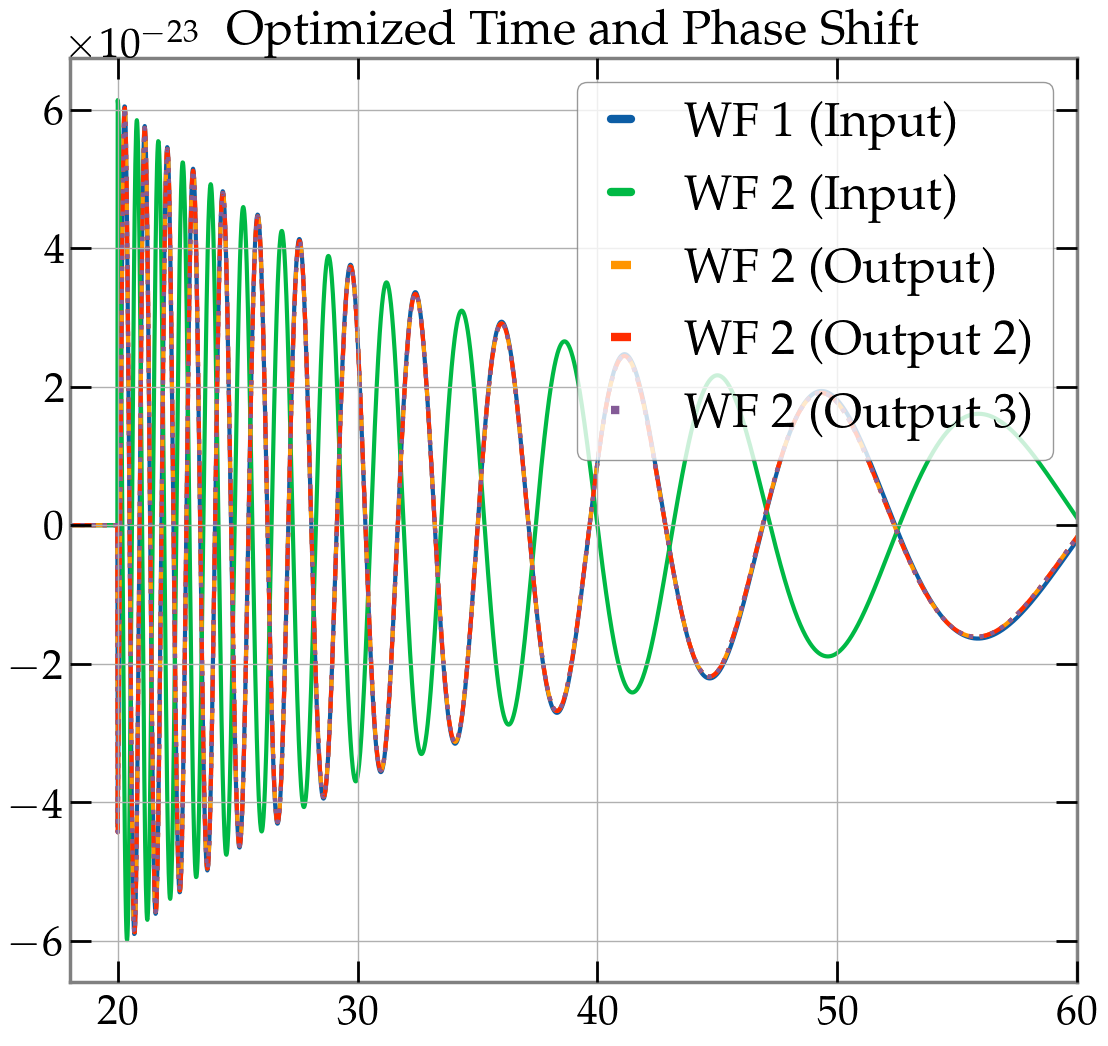

In [19]:
plt.plot(wf1, label='WF 1 (Input)')
# plt.plot(wf1_time_and_phase_shift, '--', label='WF 1 (Output)')

plt.plot(wf2, label='WF 2 (Input)')
plt.plot(wf2_time_and_phase_shift, '--', label='WF 2 (Output)')
plt.plot(wf2_time_and_phi_ref_shift, '-.', label='WF 2 (Output 2)')
plt.plot(wf2_time_and_phases_shift, ':', label='WF 2 (Output 3)')

plt.xlim(18, 60)

plt.title('Optimized Time and Phase Shift')
plt.legend()

plt.show()

Agreement is best for smaller frequencies. This is expected because the amplitude is highest there, so SNR and mismatch get main contributions from this frequency range (i.e. optimizing these quantities will lead to best fit at those frequencies).

However, it is also true that we may not be able to achieve a perfect fit. After all, PhenomD might be missing descriptions of certain effects, while PhenomX might account for them. This could explain the different phases we observe

### Over $f_\mathrm{ref}$

In [20]:
# def optimize_diff_1(wf_params, wf_generator_1, wf_generator_2):
#     wf_params = wf_params.copy()  # TODO: check if needed
#     wf1 = wf_generator_1(wf_params)

#     def wf2_shifted(tc, phic, f_ref, phi_jl):
#         wf2 = wf_generator_2(wf_params | {'f22_ref': f_ref*u.Hz, 'inclination': phi_jl*u.rad})
#         return wf2 * np.exp(-2.j * np.pi * wf2.frequencies.value * tc - 1.j * phic)
    
#     def loss_func(args):
#         tc, phic, f_ref, phi_jl = args
#         return 1.0 - overlap(wf1, wf2_shifted(tc, phic, f_ref, phi_jl))
    
#     result = minimize(loss_func, np.array([0.0, 0.0, wf_params['f22_ref'].value, 0.0]))

#     opt_args = result.x

#     return wf1, wf2_shifted(*opt_args), results


# def optimize_diff_1(wf_params, wf_generator_1, wf_generator_2):
#     wf_params = wf_params.copy()  # TODO: check if needed
#     wf1 = wf_generator_1(wf_params)

#     def wf2_shifted(tc, phic, f_ref):
#         wf2 = wf_generator_2(wf_params | {'f22_ref': f_ref*u.Hz})
#         return wf2 * np.exp(-2.j * np.pi * wf2.frequencies.value * tc + 2.j * phic)
    
#     def loss_func(args):
#         tc, phic, f_ref = args
#         return 1.0 - overlap(wf1, wf2_shifted(tc, phic, f_ref))
    
#     result = minimize(loss_func, np.array([0.0, 0.0, wf_params['f22_ref'].value]))

#     opt_args = result.x
    
#     return wf1, wf2_shifted(*opt_args), results

def optimize_diff_1(wf_params, wf_generator_1, wf_generator_2):
    wf_params = wf_params.copy()  # TODO: check if needed
    wf1 = wf_generator_1(wf_params)

    def wf2_shifted(tc, phi_ref, f_ref):
        wf2 = wf_generator_2(wf_params | {'f22_ref': f_ref*u.Hz, 'phi_ref': phi_ref*u.rad})
        return wf2 * np.exp(-2.j * np.pi * wf2.frequencies.value * tc)
    
    def loss_func(args):
        tc, phi_ref, f_ref = args
        return 1.0 - overlap(wf1, wf2_shifted(tc, phi_ref, f_ref))
    
    # result = minimize(loss_func, np.array([0.0, 0.0, wf_params['f22_ref'].value]))
    result = minimize(loss_func, np.array([0.0, 0.0, wf_params['f22_ref'].value]),
                      bounds=[(None, None), (-np.pi, np.pi), (wf_params['f22_start'].value, wf_params['f_max'].value)], method='Nelder-Mead')  # Correct bounds. This method is only one that does what it should

    opt_args = result.x
    
    return wf1, wf2_shifted(*opt_args), result

def optimize_diff_2(wf_params, wf_generator_1, wf_generator_2):
    wf_params = wf_params.copy()  # TODO: check if needed
    wf1 = wf_generator_1(wf_params)

    def wf2_shifted(tc, phi_ref, f_ref, phi_shift):
        wf2 = wf_generator_2(wf_params | {'f22_ref': f_ref*u.Hz, 'phi_ref': phi_ref*u.rad})
        return wf2 * np.exp(-2.j * np.pi * wf2.frequencies.value * tc + 2.j * phi_shift)
    
    def loss_func(args):
        tc, phi_ref, f_ref, phi_shift = args
        return 1.0 - overlap(wf1, wf2_shifted(tc, phi_ref, f_ref, phi_shift))
    
    # result = minimize(loss_func, np.array([0.0, 0.0, wf_params['f22_ref'].value]))

    # result = minimize(loss_func, np.array([0.0, 0.0, wf_params['f22_ref'].value, 0.0]),
    result = minimize(loss_func, np.array([0.0, -0.1, wf_params['f22_ref'].value, 0.1]),
                      bounds=[(None, None), (-np.pi, np.pi), (wf_params['f22_start'].value, wf_params['f_max'].value), (-np.pi, np.pi)], method='Nelder-Mead')  # Correct bounds. This method is only one that does what it should

    opt_args = result.x
    
    return wf1, wf2_shifted(*opt_args), result

In [21]:
wf1_all_params_shifted, wf2_all_params_shifted, info_all_params_shift = optimize_diff_1(alignment_demo_params, wf_generator_1, wf_generator_2)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [22]:
wf1_all_params_shifted_2, wf2_all_params_shifted_2, info_all_params_shift_2 = optimize_diff_2(alignment_demo_params, wf_generator_1, wf_generator_2)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

About 2 min for f_ref and inclination optimization, about 1.5 min for only f_ref

-> uh, much better if bounds are specified

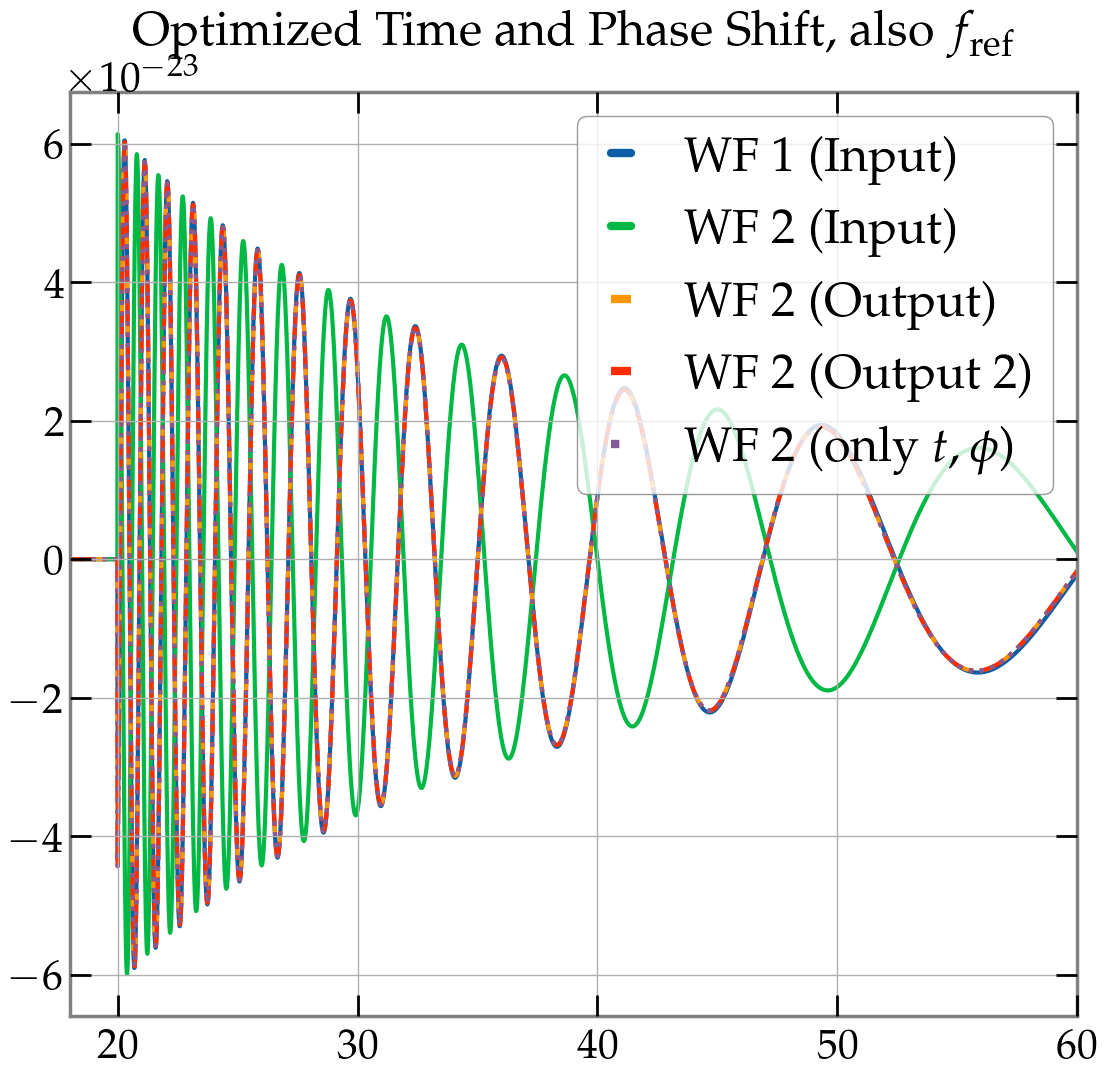

In [23]:
plt.plot(wf1, label='WF 1 (Input)')
# plt.plot(wf1_all_params_shifted, '--', label='WF 1 (Output)')

plt.plot(wf2, label='WF 2 (Input)')
plt.plot(wf2_all_params_shifted, '--', label='WF 2 (Output)')
plt.plot(wf2_all_params_shifted_2, '-.', label='WF 2 (Output 2)')
plt.plot(wf2_time_and_phase_shift, ':', label=r'WF 2 (only $t, \phi$)')

plt.xlim(18, 60)

# plt.title(r'Optimized Time and Phase Shift, also $f_\mathrm{ref}$ and inclination')
plt.title(r'Optimized Time and Phase Shift, also $f_\mathrm{ref}$')
plt.legend()

plt.show()

Optimizing over $f_\mathrm{ref}$ helps a little, but not too much. Also takes a long time

### Comparison of Results

In [24]:
# print(f'{info_time_shift=}')
# print(f'{info_phase_shift=}')
# print(f'{info_phi_ref_shift=}')
# print(f'{info_time_and_phase_shift=}')
# print(f'{info_all_params_shift=}')


print(f'{info_time_shift.fun = }, {info_time_shift.x = }, {info_time_shift.nfev = }')
print(f'{info_phase_shift.fun = }, {info_phase_shift.x = }, {info_phase_shift.nfev = }')
print(f'{info_phi_ref_shift.fun = }, {info_phi_ref_shift.x = }, {info_phi_ref_shift.nfev = }')
print(f'{info_time_and_phase_shift.fun = }, {info_time_and_phase_shift.x = }, {info_time_and_phase_shift.nfev = }')
print(f'{info_time_and_phi_ref_shift.fun = }, {info_time_and_phi_ref_shift.x = }, {info_time_and_phi_ref_shift.nfev = }')
print(f'{info_time_and_phases_shift.fun = }, {info_time_and_phase_shift.x = }, {info_time_and_phase_shift.nfev = }')
print(f'{info_all_params_shift.fun = }, {info_all_params_shift.x = }, {info_all_params_shift.nfev = }')
print(f'{info_all_params_shift_2.fun = }, {info_all_params_shift_2.x = }, {info_all_params_shift_2.nfev = }')


# for info in [info_time_shift, info_phase_shift, info_phi_ref_shift, info_time_and_phase_shift, info_time_and_phi_ref_shift, info_all_params_shift]:
#     print(f'{info}: {info.fun = }, {info.x = }, {info.nfev = }')

info_time_shift.fun = 0.9876396351582258, info_time_shift.x = array([1.00738079]), info_time_shift.nfev = 12
info_phase_shift.fun = 0.17596961972347358, info_phase_shift.x = array([-1.34945758]), info_phase_shift.nfev = 14
info_phi_ref_shift.fun = 0.1759696197234738, info_phi_ref_shift.x = array([-1.34945758]), info_phi_ref_shift.nfev = 14
info_time_and_phase_shift.fun = 0.03684895941174902, info_time_and_phase_shift.x = array([ 0.00321693, -0.98698079]), info_time_and_phase_shift.nfev = 128
info_time_and_phi_ref_shift.fun = 0.0006123354802924919, info_time_and_phi_ref_shift.x = array([ 0.00321693, -0.98698079]), info_time_and_phi_ref_shift.nfev = 128
info_time_and_phases_shift.fun = 0.0006123349608931905, info_time_and_phase_shift.x = array([ 0.00321693, -0.98698079]), info_time_and_phase_shift.nfev = 128
info_all_params_shift.fun = 0.0006123417056738134, info_all_params_shift.x = array([ 3.21737831e-03, -1.40918362e-03,  2.10681191e+01]), info_all_params_shift.nfev = 153
info_all_par

Clearly, there is a correlation of phi_ref and f_ref. After all, time_and_phase_shift and all_params_shift produce nearly identical results.

This is also expected, their definitions are totally intertwined.

In [3]:
params = np.array(['total_mass', 'mass_ratio', 'distance'])
# test_params = np.array(['mass_ratio', 'distance'])
test_params = np.array(['distance', 'mass_ratio'])

print(np.isin(params, ['distance', 'mass_ratio']))
print(np.where(np.isin(params, ['distance', 'mass_ratio'])))
print(np.nonzero(np.isin(params, ['distance', 'mass_ratio'])))
print([np.argwhere(param == params)[0,0] for param in np.array(params)[np.isin(params, test_params)]])
# print([np.argwhere(param == params).reshape(-1) for param in np.array(params)[np.isin(params, test_params)]])
# print([np.where(param == params) for param in params[np.isin(params, test_params)]])
print([np.argwhere(param == params)[0,0] for param in np.array(test_params)[np.isin(test_params, params)]])


[False  True  True]
(array([1, 2]),)
(array([1, 2]),)
[1, 2]
[2, 1]


In [7]:
len(dict(a=1, b=2))

2

In [6]:
isinstance(params, list)

False

In [4]:
np.isin(test_params, None)

array([False, False])

In [58]:
# print([np.argwhere(param) for param in test_params[np.isin(params, test_params)]])
# test_params[np.isin(params, test_params)]
# np.isin(params, test_params)
np.array(params)[np.isin(params, test_params)]

np.argwhere(params[0] in params)

array([], shape=(1, 0), dtype=int64)

In [68]:
for param in np.array(params)[np.isin(params, test_params)]:
    # print(param)
    # print(params[np.argwhere(param == params)[0,0]])
    # print(params[np.argwhere(param == params).reshape(-1)])
    print(np.argwhere(param == params).reshape(-1))
    # print(np.argwhere(param == params).reshape(1))
    # print(np.where([param] == params))
    # print(np.nonzero(params == [param]))

[1]
[2]


In [72]:
np.ix_([1, 2], [1, 2])

(array([[1],
        [2]]),
 array([[1, 2]]))